In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
import librosa
from spafe.features.gfcc import gfcc

/Users/noone/Time_Series/Time_Series/venv/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [4]:
one_wav = 'one.wav'
two_wav = 'two.wav'

samplerate1, data1 = wavfile.read(one_wav)
samplerate2, data2 = wavfile.read(two_wav)
print('Sampling Rate:', samplerate1, '; Audio Shape:', np.shape(data1))
print('Sampling Rate:', samplerate2, '; Audio Shape:', np.shape(data2))

Sampling Rate: 44100 ; Audio Shape: (306432, 2)
Sampling Rate: 44100 ; Audio Shape: (95663, 2)


In [4]:
sd.play(data1, samplerate1)
sd.wait()

In [5]:
sd.play(data2, samplerate2)
sd.wait()

In [5]:
duration1 = len(data1) / samplerate1
time1 = np.arange(0, duration1, 1 / samplerate1)

duration2 = len(data2) / samplerate2
time2 = np.arange(0, duration2, 1 / samplerate2)

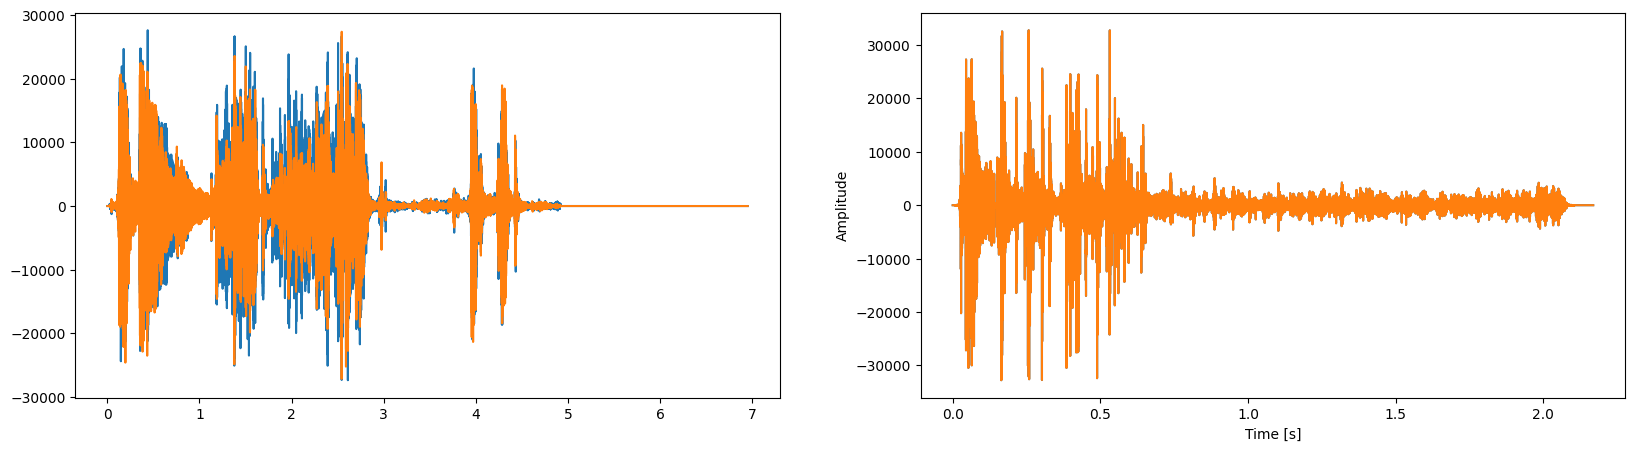

In [6]:
fig, axs = plt.subplots(1,2,figsize=(20, 5))
axs[0].plot(time1, data1)
axs[1].plot(time2, data2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

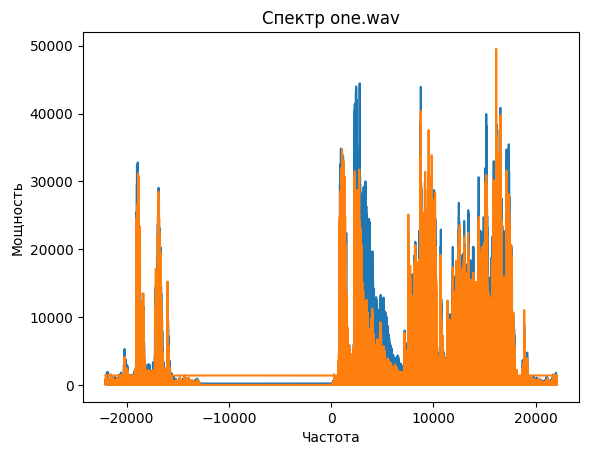

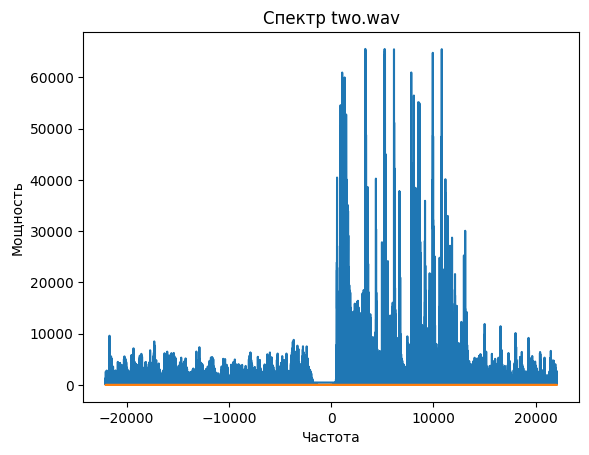

In [7]:
from scipy.fft import fft, fftfreq

duration = len(data1) / samplerate1
N = int(samplerate1 * duration)
yf = fft(data1)
xf = fftfreq(N, 1 / samplerate1)
plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.title('Спектр one.wav')
plt.show()

duration = len(data2) / samplerate2
N = int(samplerate2 * duration)
yf = fft(data2)
xf = fftfreq(N, 1 / samplerate2)
plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.title('Спектр two.wav')
plt.show()

/var/folders/62/y6pdrbb503l9t095f2_2wsbm0000gn/T/ipykernel_7439/2797764728.py:5: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


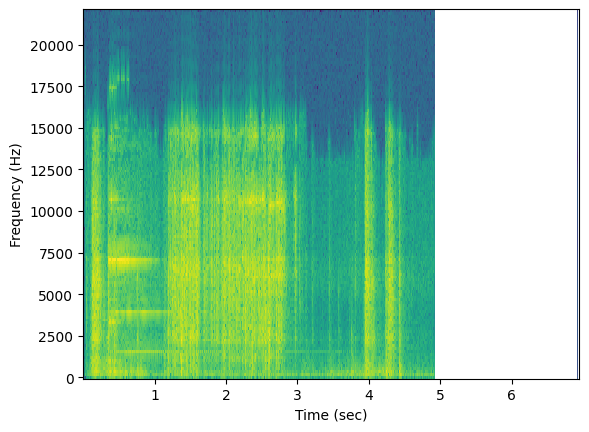

In [12]:
adata = data1[:, 0]
s = samplerate1

fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

/var/folders/62/y6pdrbb503l9t095f2_2wsbm0000gn/T/ipykernel_7439/1548162407.py:5: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


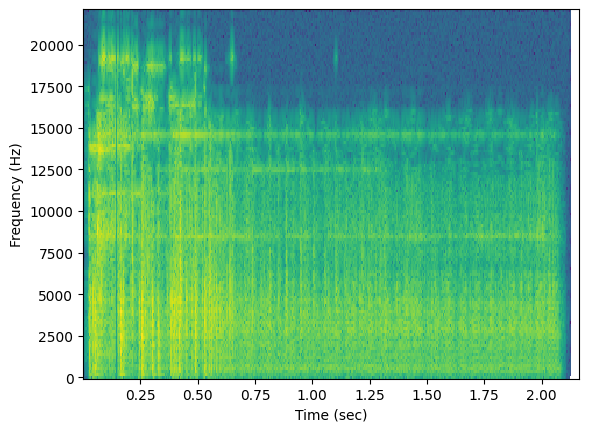

In [13]:
adata = data2[:, 0]
s = samplerate2

fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

In [14]:
samples1, sample_rate1 = librosa.load(one)

y1 = samples1
sr1 = sample_rate1
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=10)

samples2, sample_rate2 = librosa.load(two)

y2 = samples2
sr2 = sample_rate2
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=10)

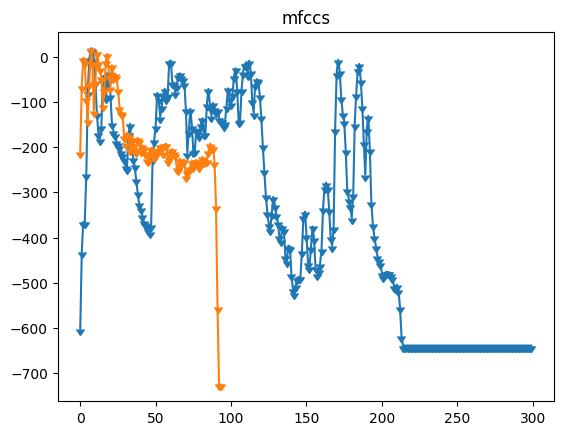

In [20]:
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=10)
s1 = mfccs1[0:1,:][0,:]
t1 = [*range(len(s1))]
s2 = mfccs2[0:1,:][0,:]
t2 = [*range(len(s2))]
plt.plot(t1,  s1.reshape(300,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.plot(t2,  s2.reshape(94,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.title('mfccs')
plt.show()

In [23]:
samples1, sample_rate1 = librosa.load(one_wav)

y1 = samples1
sr1 = sample_rate1
gfccs1 = gfcc(y1, fs=sr1, num_ceps=1)

samples2, sample_rate2 = librosa.load(two_wav)

y2 = samples2
sr2 = sample_rate2
gfccs2 = gfcc(y2, fs=sr2, num_ceps=1)   

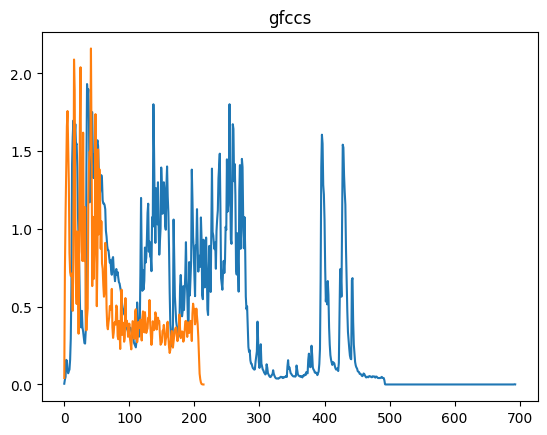

In [24]:
plt.plot(gfccs1)
plt.plot(gfccs2)
plt.title('gfccs')
plt.show()

Видим, что звон монет из первого файла совпадает со звоном монет из второго файла. Т.к. в одном файле затухание происходит раньше, мы можем видеть отличия на графиках и спектрограмме 